In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/kaggle/input/thyroid-disease-data/thyroidDF.csv")
data.info

<bound method DataFrame.info of       age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0

In [3]:
data.dropna(inplace=True)

In [4]:
data['sex'] = data['sex'].map({'M': 1, 'F': 0})
data['on_thyroxine'] = data['on_thyroxine'].map({'t': 1, 'f': 0})
data['query_on_thyroxine'] = data['query_on_thyroxine'].map({'t': 1, 'f': 0})
data['on_antithyroid_meds'] = data['on_antithyroid_meds'].map({'t': 1, 'f': 0})
data['sick'] = data['sick'].map({'t': 1, 'f': 0})
data['pregnant'] = data['pregnant'].map({'t': 1, 'f': 0})
data['thyroid_surgery'] = data['thyroid_surgery'].map({'t': 1, 'f': 0})
data['I131_treatment'] = data['I131_treatment'].map({'t': 1, 'f': 0})
data['query_hypothyroid'] = data['query_hypothyroid'].map({'t': 1, 'f': 0})
data['query_hyperthyroid'] = data['query_hyperthyroid'].map({'t': 1, 'f': 0})
data['lithium'] = data['lithium'].map({'t': 1, 'f': 0})
data['goitre'] = data['goitre'].map({'t': 1, 'f': 0})
data['tumor'] = data['tumor'].map({'t': 1, 'f': 0})
data['hypopituitary'] = data['hypopituitary'].map({'t': 1, 'f': 0})
data['psych'] = data['psych'].map({'t': 1, 'f': 0})
data['TSH_measured'] = data['TSH_measured'].map({'t': 1, 'f': 0})
data['T3_measured'] = data['T3_measured'].map({'t': 1, 'f': 0})
data['TT4_measured'] = data['TT4_measured'].map({'t': 1, 'f': 0})
data['T4U_measured'] = data['T4U_measured'].map({'t': 1, 'f': 0})
data['FTI_measured'] = data['FTI_measured'].map({'t': 1, 'f': 0})
data['TBG_measured'] = data['TBG_measured'].map({'t': 1, 'f': 0})
data['referral_source'] = data['referral_source'].map({'SVI': 1, 'other': 0})
data['target'] = data['target'].map({'F': 0, '-': 1, 'K': 2, 'I': 3, 'G': 4, 'N': 5})



In [5]:
data = data.drop('patient_id',axis=1)


In [6]:
# Diviser les données en features et target
X = data.drop(columns=[ 'target'])
y = data['target']

# Créer un classifieur SVM avec un noyau linéaire et une pondération des classes équilibrée
svm = SVC(kernel='linear' ,class_weight='balanced') 

# Prédire les labels avec validation croisée
y_pred = cross_val_predict(svm, X, y, cv=10)



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [7]:
# Calculer et afficher la matrice de confusion
conf_matrix = confusion_matrix(y, y_pred)

# Calcul des mesures de performance à partir de la matrice de confusion
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Calcul de la précision
precision = TP / (TP + FP)

# Calcul du rappel
recall = TP / (TP + FN)

# Calcul du F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calcul de l'exactitude
accuracy = (TN + TP) / (TN + FP + FN + TP)

/tmp/ipykernel_18/1259733865.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
/tmp/ipykernel_18/1259733865.py:14: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


* SVM RESULTS (Cross Validation) :
Accuracy: 1.0
Précision: nan
Recall: nan
F1 Score: nan


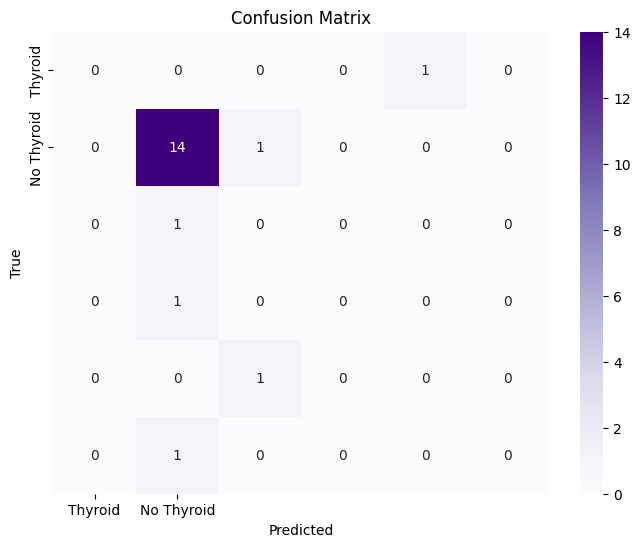

In [8]:

# Affichage des mesures de performance
print("* SVM RESULTS (Cross Validation) :")
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=['Thyroid', 'No Thyroid'], yticklabels=['Thyroid', 'No Thyroid'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
conf_matrix

array([[ 0,  0,  0,  0,  1,  0],
       [ 0, 14,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0]])